In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd drive/My\ Drive/

[Errno 2] No such file or directory: 'drive/My Drive/'
/content/drive/My Drive/features22june


In [ ]:
cd features22june/

[Errno 2] No such file or directory: 'features22june/'
/content/drive/My Drive/features22june


In [ ]:
ls

bnzcategory.csv     bnztokens.csv          Onehack_category.csv
bnzcategory.gsheet  category.csv           Onehack_features.pickle
bnzfcategory.csv    features               Onehack_tokens.csv
bnzfeatures         features_with_cat_tag  tokens.csv
bnzftokens.csv      labels.csv             tokens.gsheet
bnzlabels.csv       labels.gsheet


In [49]:
import pickle
import pandas as pd
with open("Hopscotch_features.pickle", 'rb') as pickle_file:
  X = pickle.load(pickle_file)

In [50]:
y = pd.read_csv ("Hopscotch_category.csv")
X = pd.DataFrame(X)

In [51]:
y = y.drop('Unnamed: 0',1)
num_classes = len(y['0'].unique())
y['0'].value_counts().sort_values()

hopscotch-draft-glitch                                    1
how-to-make-character-silhouettes                         1
how-to-make-an-object-point-to-an-object                  1
mega-summer-camp-2018-join-now                            1
how-do-you-make-an-account-that-s-not-a-school-account    1
                                                         ..
hi-i-m-new-here                                           2
im-new-to-the-forum                                       3
10-facts-about-me                                         3
recycling-in-progress                                     3
halloween-contest                                         3
Name: 0, Length: 4877, dtype: int64

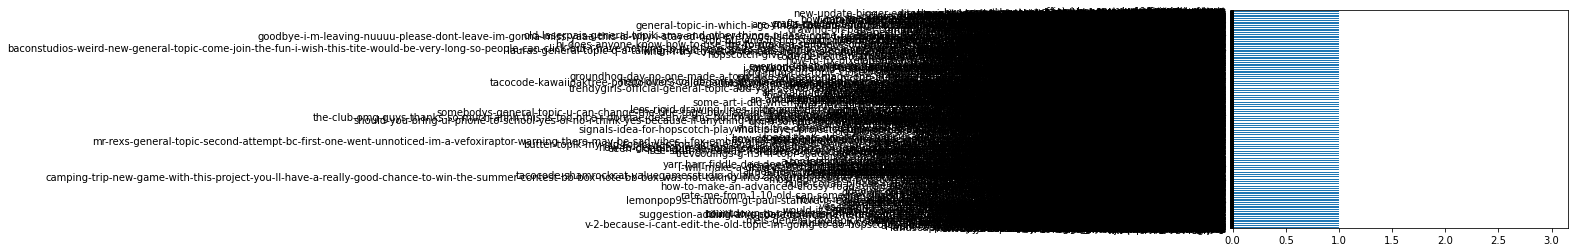

In [52]:
y['0'].value_counts().sort_values().plot(kind = 'barh')


In [53]:
drop_cat=[]
counts = dict(y['0'].value_counts())
for cat in counts.keys():
  if counts[cat]<3:
    drop_cat.append(cat)

In [54]:
Data = pd.concat([y,X],axis=1)
print(Data.shape)
for cat in drop_cat:
  Data.drop(Data.loc[Data['0'] == cat].index, inplace=True)

(4900, 769)


In [55]:
Data.shape

(12, 769)

In [56]:
y = Data['0']
X = Data.drop('0',axis=1)

# UNDER SAMPLING

In [57]:
from imblearn.under_sampling import ClusterCentroids#undersampling
cc = ClusterCentroids(random_state=0)
X, y = cc.fit_resample(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/imblearn/under_sampling/_prototype_generation/_cluster_centroids.py:156: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  self.estimator_.fit(X[y == target_class])
/usr/local/lib/python3.6/dist-packages/imblearn/under_sampling/_prototype_generation/_cluster_centroids.py:156: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  self.estimator_.fit(X[y == target_class])
/usr/local/lib/python3.6/dist-packages/imblearn/under_sampling/_prototype_generation/_cluster_centroids.py:156: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_

In [59]:
y=pd.DataFrame(y)

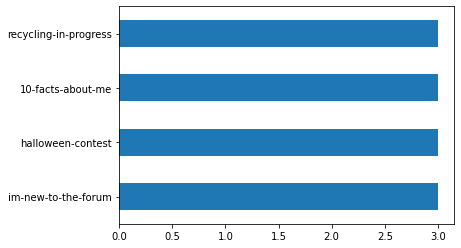

In [60]:
y[0].value_counts().sort_values().plot(kind = 'barh')


In [61]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# XGBOOST

In [62]:
from xgboost import XGBClassifier

# Create a classifier
xgb = XGBClassifier(booster='gbtree', objective='multi:softprob', eval_metric="auc", num_class=num_classes)

In [63]:
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing

xgb.fit(X_train,y_train)
# Use trained model to predict output of test dataset
val = xgb.predict(X_test)

lb = preprocessing.LabelBinarizer()
lb.fit(y_test)

y_test_lb = lb.transform(y_test)
val_lb = lb.transform(val)

roc_auc_score(y_test_lb, val_lb, average='macro')

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.0

# SVM

In [64]:
import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler,MinMaxScaler


In [65]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [66]:
scaler = MinMaxScaler()
X_train_mm = scaler.fit_transform(X_train)
X_test_mm = scaler.transform(X_test)

In [67]:
encoder = preprocessing.LabelEncoder()

encoder.fit(y_train)
Y_train = encoder.transform(y_train)

encoder.fit(y_test)
Y_test = encoder.transform(y_test)



/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [68]:
params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

In [69]:
svm_model = GridSearchCV(SVC(), params_grid, cv=2)
svm_model.fit(X_train_scaled, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  % (min_groups, self.n_splits)), UserWarning)


GridSearchCV(cv=2, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [70]:
print('Best score for training data:', svm_model.best_score_,"\n") 
print('Best C:',svm_model.best_estimator_.C,"\n") 
print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")

final_model = svm_model.best_estimator_
Y_pred = final_model.predict(X_test_scaled)
Y_pred_label = list(encoder.inverse_transform(Y_pred))

Best score for training data: 0.9 

Best C: 1 

Best Kernel: rbf 

Best Gamma: 0.001 



ValueError: ignored

In [71]:
print(confusion_matrix(y_test,Y_pred_label))
print("\n")
print(classification_report(y_test,Y_pred_label))

print("Training set score for SVM: %f" % final_model.score(X_train_scaled , Y_train))
print("Testing  set score for SVM: %f" % final_model.score(X_test_scaled  , Y_test ))



ValueError: ignored

# NN


In [72]:
from keras import models
from keras import layers
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

Using TensorFlow backend.


In [73]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import Adam

def NN(X_train, y_train,X_test,epoch):

    

    model = Sequential([#Dropout(0.2, input_shape=(768,)),
                                Dense(256, activation='relu', input_shape=(768,)),
                                Dense(128, activation='relu'),
                                Dense(4, activation='softmax'),
                            ])

    opt = Adam(lr=0.001)
    model.compile( optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(  X_train,  y_train,  epochs=epoch,  batch_size=256)
    y_pred=model.predict(X_test)
    #print('a',y_pred)
    return y_pred
       

In [74]:
lb = preprocessing.LabelBinarizer()
lb.fit(y_train)

y_train_lb = lb.transform(y_train)

In [75]:
# y_pred = NN(X_train,y_train_lb,X_test, 400)
# y_pred = NN(X_train_scaled,y_train_lb,X_test_scaled, 200) #80
y_pred = NN(X_train_mm,y_train_lb,X_test_mm, 500)

Epoch 1/500
9/9 [==============================] - 0s 40ms/step - loss: 1.6222 - accuracy: 0.5556
Epoch 2/500
9/9 [==============================] - 0s 578us/step - loss: 0.6661 - accuracy: 0.8889
Epoch 3/500
9/9 [==============================] - 0s 1ms/step - loss: 0.2852 - accuracy: 0.8889
Epoch 4/500
9/9 [==============================] - 0s 799us/step - loss: 0.1618 - accuracy: 1.0000
Epoch 5/500
9/9 [==============================] - 0s 1ms/step - loss: 0.1074 - accuracy: 1.0000
Epoch 6/500
9/9 [==============================] - 0s 786us/step - loss: 0.0695 - accuracy: 1.0000
Epoch 7/500
9/9 [==============================] - 0s 1ms/step - loss: 0.0436 - accuracy: 1.0000
Epoch 8/500
9/9 [==============================] - 0s 927us/step - loss: 0.0282 - accuracy: 1.0000
Epoch 9/500
9/9 [==============================] - 0s 761us/step - loss: 0.0199 - accuracy: 1.0000
Epoch 10/500
9/9 [==============================] - 0s 889us/step - loss: 0.0149 - accuracy: 1.0000
Epoch 11/500
9/9

In [76]:
import numpy as np
pred = np.argmax(y_pred,axis=1)
# lb.fit(pred)
# pred = lb.transform(pred)

In [77]:
from sklearn.metrics import accuracy_score
accuracy_score(pred,Y_test)


1.0

# OVER SAMPLING

In [ ]:
# from imblearn.over_sampling import SMOTE #OVER SAMPLING
# X_train,y_train = SMOTE().fit_sample(X_train, y_train)